<a href="https://colab.research.google.com/github/appletreeleaf/ML_Projects/blob/main/Hackerthon_kaggle_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

%matplotlib inline

### Loading Data

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/GBT해커톤/Data'
train=pd.read_csv(path + '/train.csv')
df=train.copy()
test=pd.read_csv(path + '/test.csv')
df_test=test.copy()

df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'cyan',
                            'border-color': 'white'})

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,-0.996688,2011,7,-1.000000,0,3,93,0,0,3059,0.000000,0,13,78,nan,nan,nan,nan,nan,nan,888,nan,0.000000,27.000000,1,14,16,1,16,6,1951,0,8504,21370,0,427,2,nan,5,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,154.000000,75,1
1,TRAIN_00001,COMPONENT2,-0.997615,2021,51,-0.962963,0,2,19,0,0,2978,0.000000,0,0,31,nan,nan,nan,nan,nan,nan,2,nan,0.000000,nan,0,1,0,0,1,0,572,2,19,1117,0,0,0,nan,0,0.000000,0.000000,1.000000,2.000000,4.000000,6.000000,216.000000,1454.000000,0,nan,44.000000,652,0
2,TRAIN_00002,COMPONENT2,-0.990356,2015,2,-1.000000,0,110,1,1,0,17,0.000000,0,1,2,nan,nan,nan,nan,nan,nan,4,nan,0.000000,0.000000,0,0,0,0,2,0,328,0,17,1334,0,0,1,nan,0,0.000000,0.000000,0.000000,0.000000,3.000000,39.000000,11261.000000,41081.000000,0,nan,72.600000,412,0
3,TRAIN_00003,COMPONENT3,-0.956456,2010,2,-1.000000,0,8,3,0,0,1960,0.000000,0,0,1,nan,nan,nan,nan,nan,nan,37,nan,0.000000,nan,0,4,1,0,0,0,906,1,44,21774,2,1,1,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,133.300000,7,0
4,TRAIN_00004,COMPONENT3,-0.979867,2015,4,-1.000000,0,1,157,0,0,71,0.000000,0,0,0,nan,nan,nan,nan,nan,nan,71,nan,0.000000,0.000000,0,0,0,0,2,0,309,0,217,18470,0,2,0,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,133.100000,128,0


In [5]:
features = ['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

In [6]:
def check_df(df):
    print("##################### Shape #####################")
    print(df.shape)
    print("##################### Types #####################")
    print(df.dtypes)
    print("##################### Head #####################")
    print(df.head(3))
    print("##################### Tail #####################")
    print(df.tail(3))
    print("##################### Null values #####################")
    print(df.isnull().sum())
    print("##################### Quantiles #####################")
    print(df.describe().T)
    print("##################### Unique #####################")
    print(df.nunique())
    print("##################### Columns #####################")
    print(df.columns)

check_df(df)

##################### Shape #####################
(14095, 54)
##################### Types #####################
ID                      object
COMPONENT_ARBITRARY     object
ANONYMOUS_1            float64
YEAR                     int64
SAMPLE_TRANSFER_DAY      int64
ANONYMOUS_2            float64
AG                       int64
AL                       int64
B                        int64
BA                       int64
BE                       int64
CA                       int64
CD                     float64
CO                       int64
CR                       int64
CU                       int64
FH2O                   float64
FNOX                   float64
FOPTIMETHGLY           float64
FOXID                  float64
FSO4                   float64
FTBN                   float64
FE                       int64
FUEL                   float64
H2O                    float64
K                      float64
LI                       int64
MG                       int64
MN                  

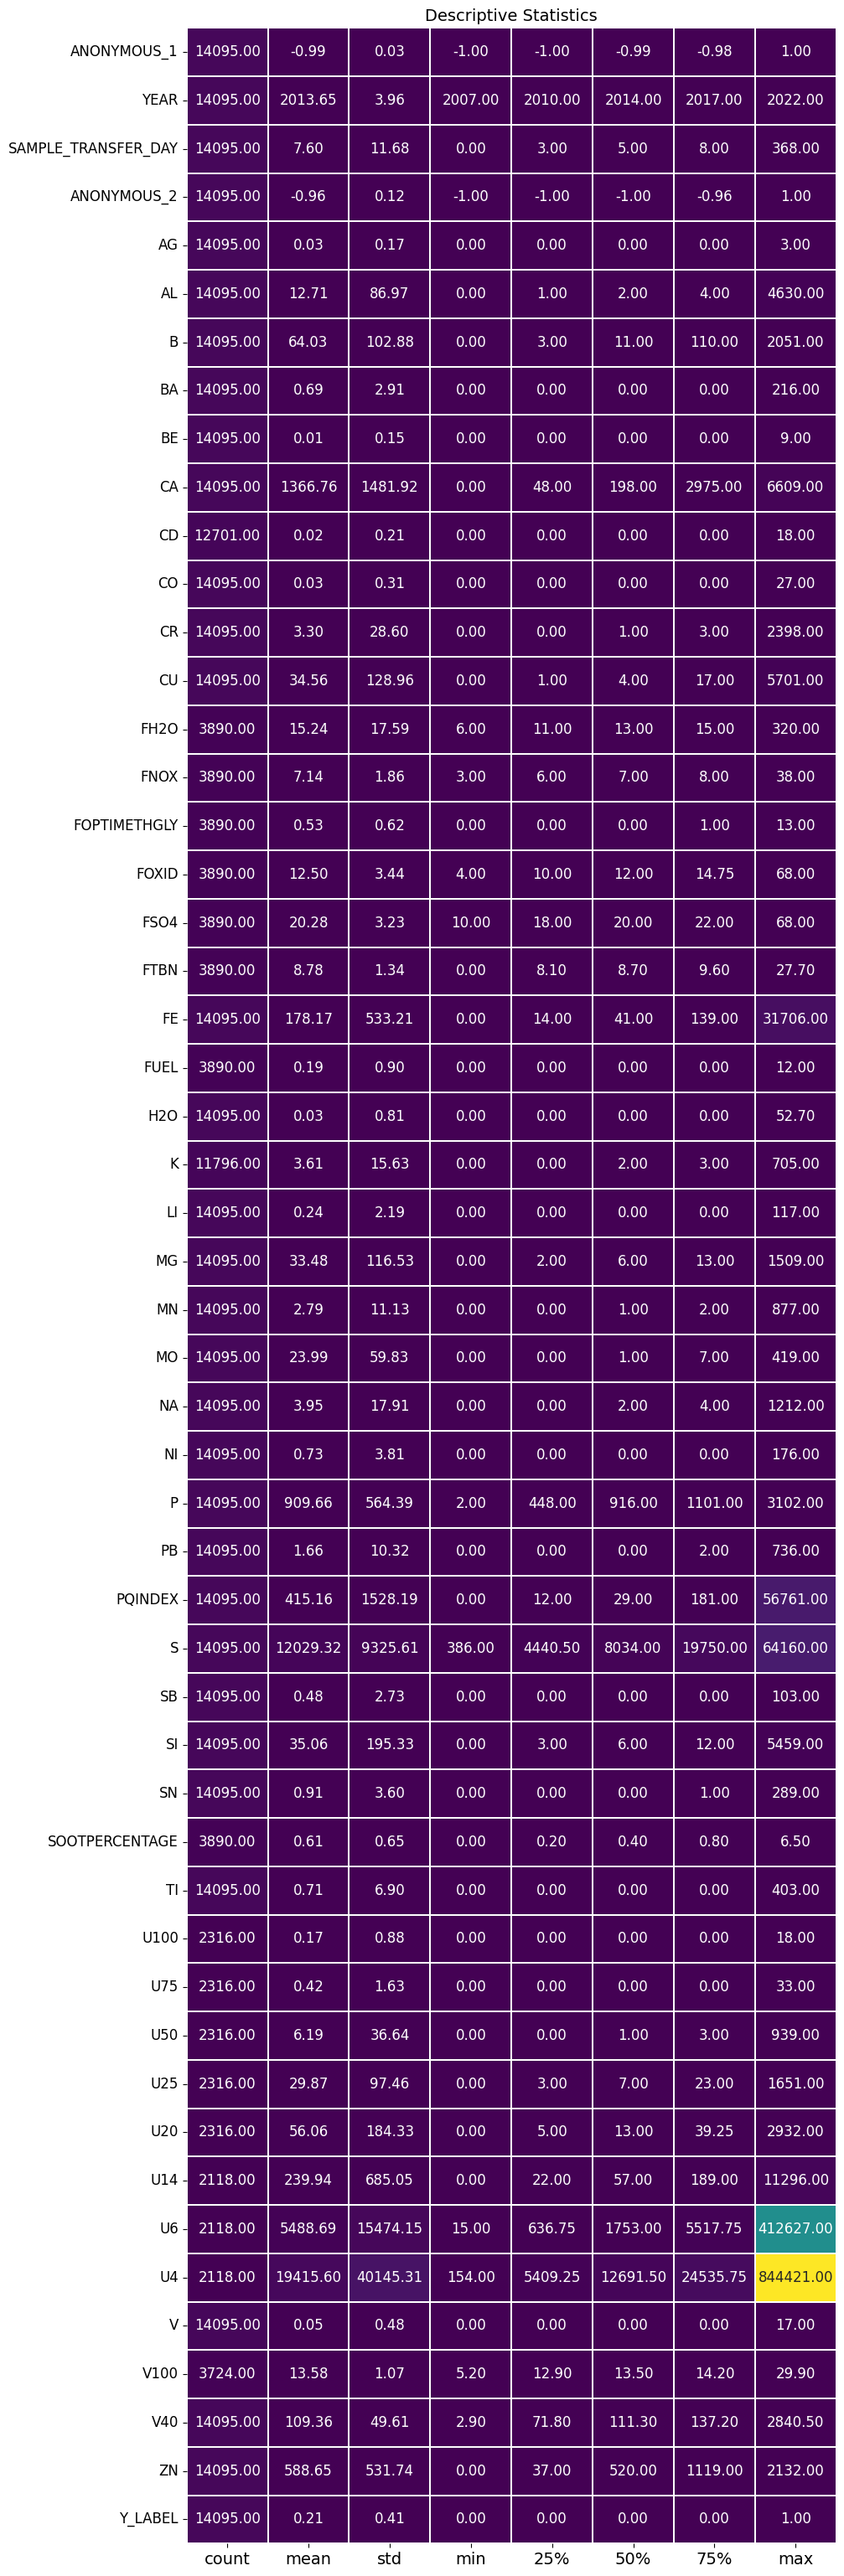

In [7]:
# describe stats of the data
cols=df.select_dtypes(include=['float64','int64'])
cmap1 = 'viridis'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()

desc_stats(cols)

### Preprocessing

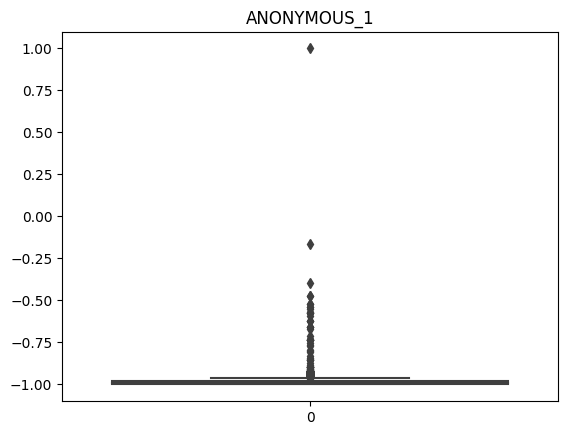

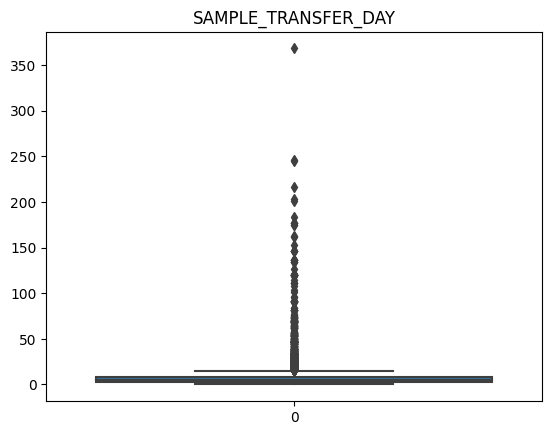

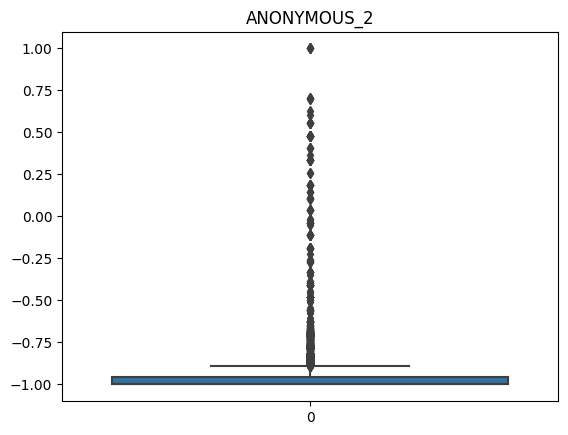

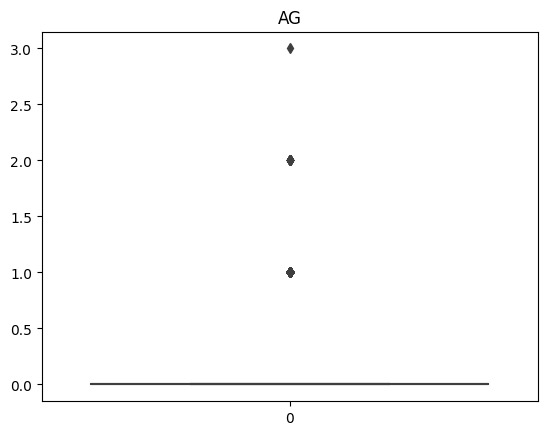

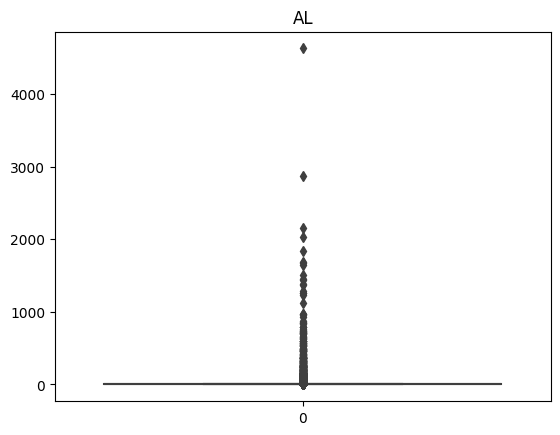

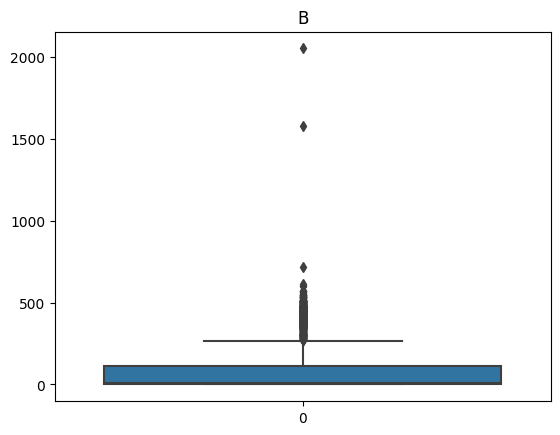

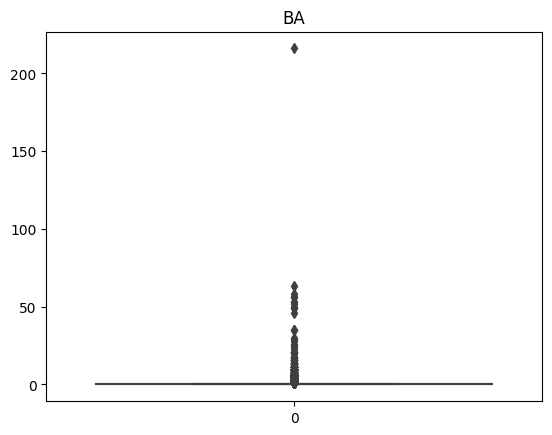

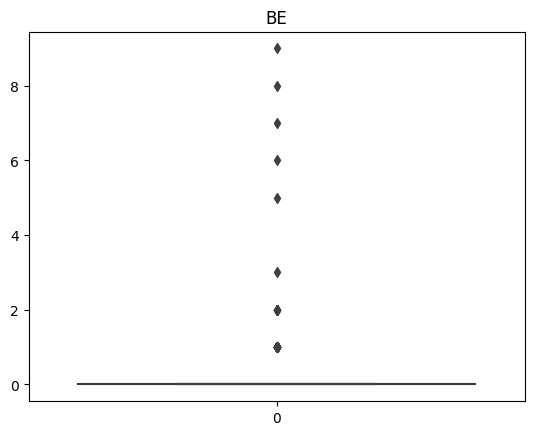

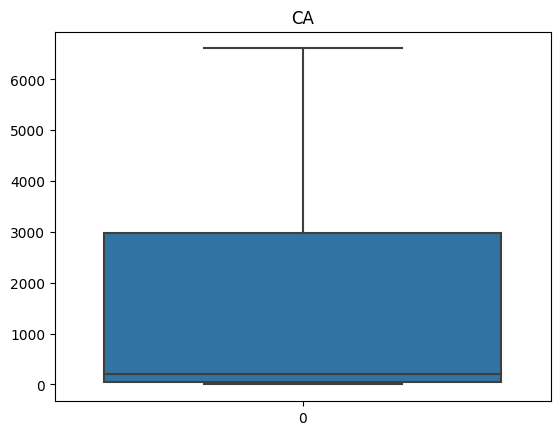

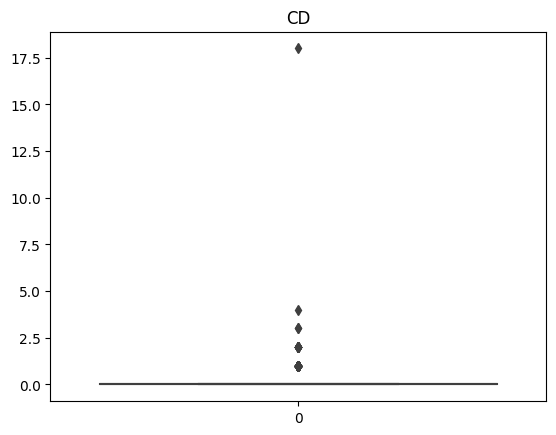

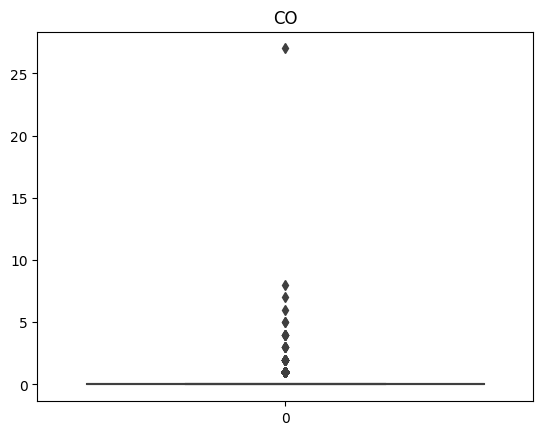

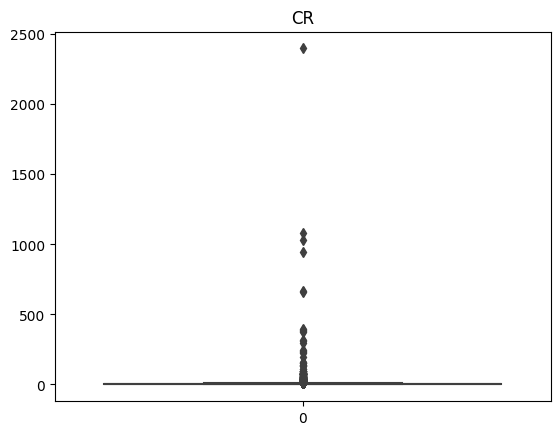

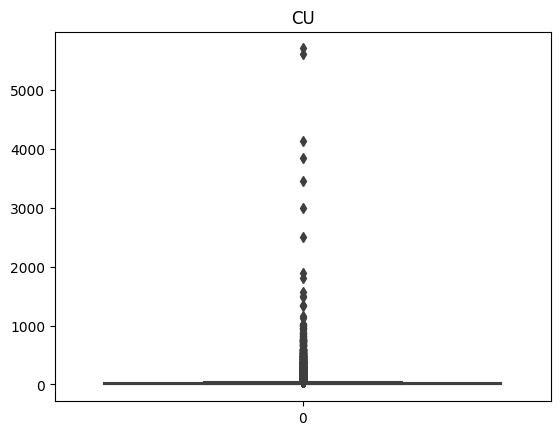

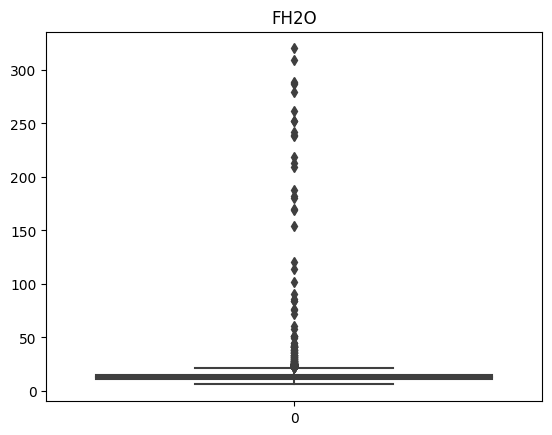

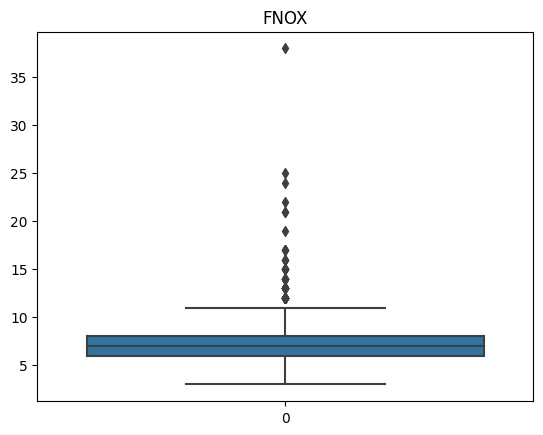

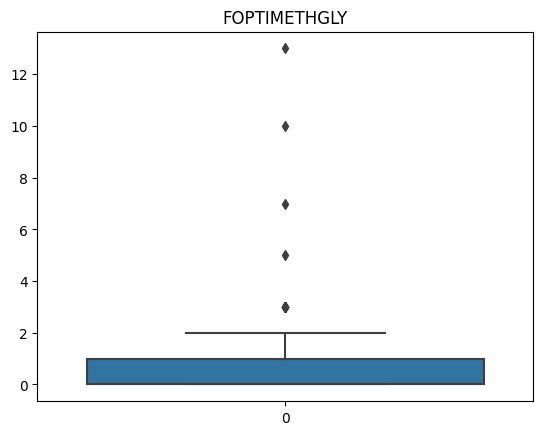

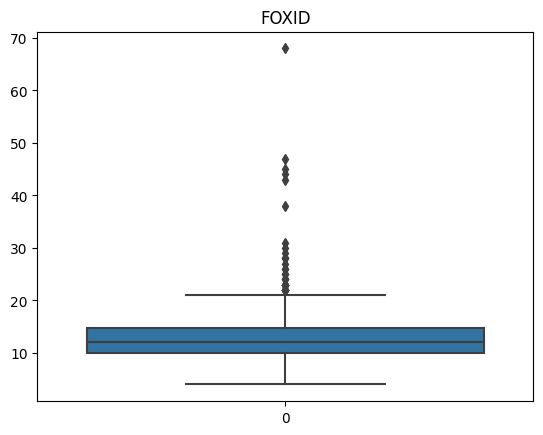

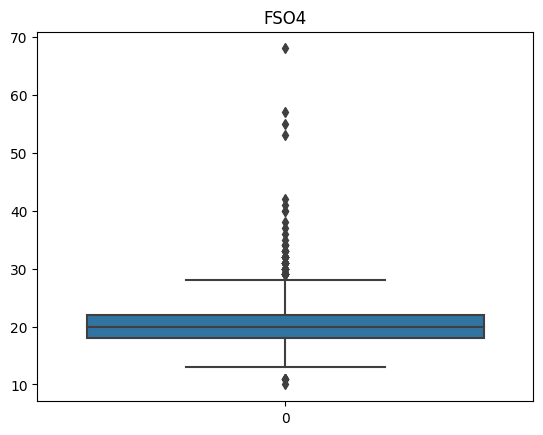

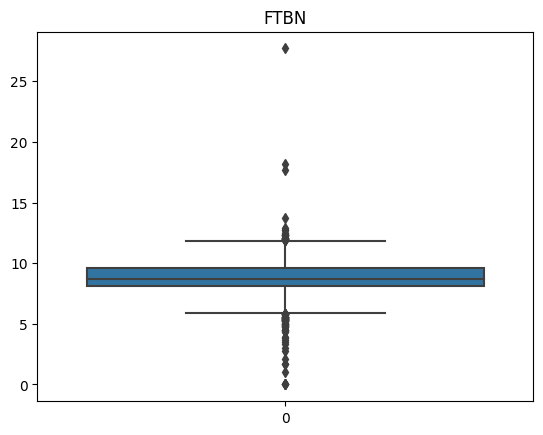

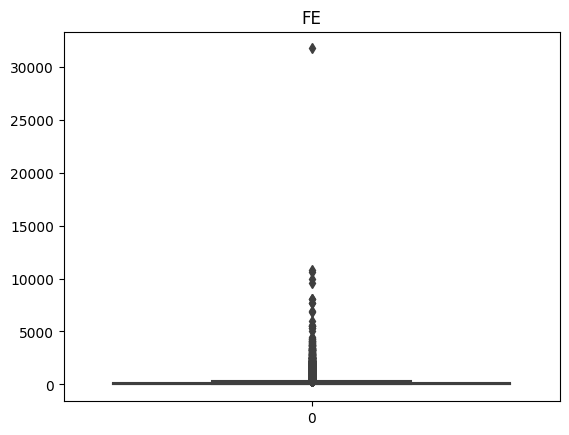

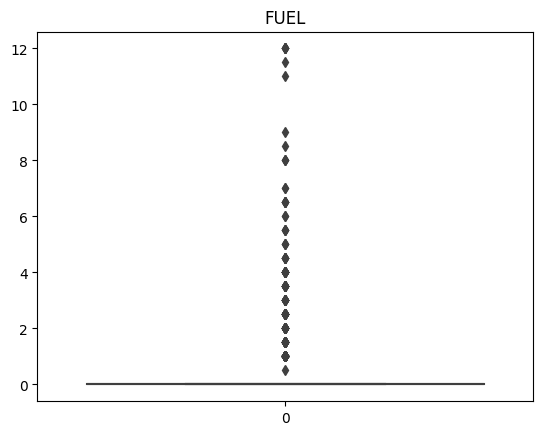

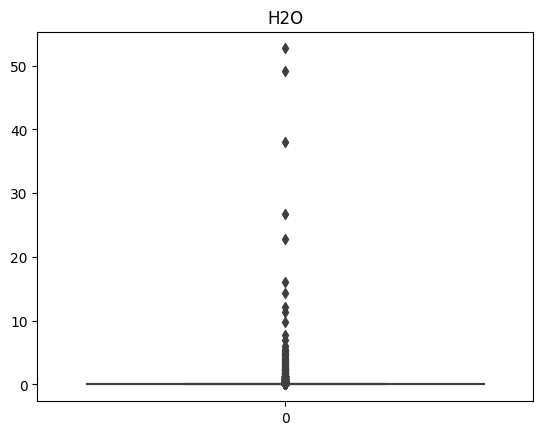

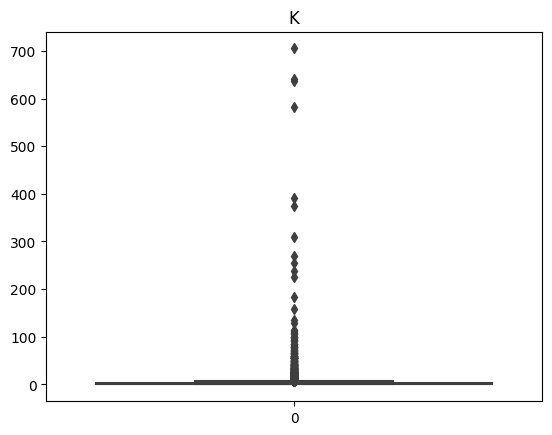

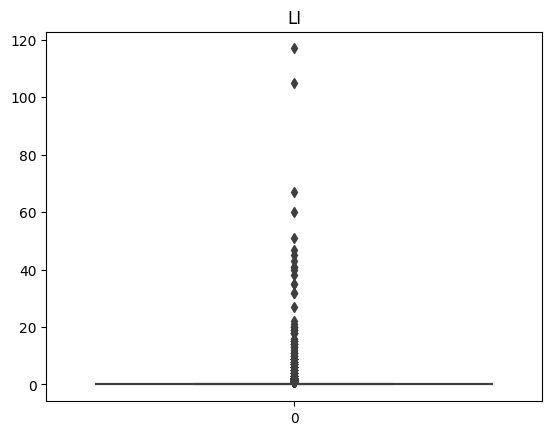

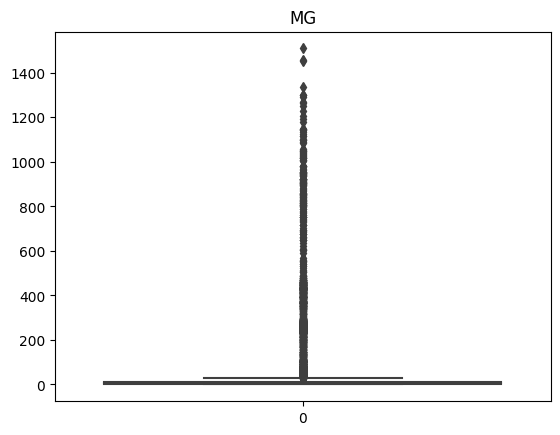

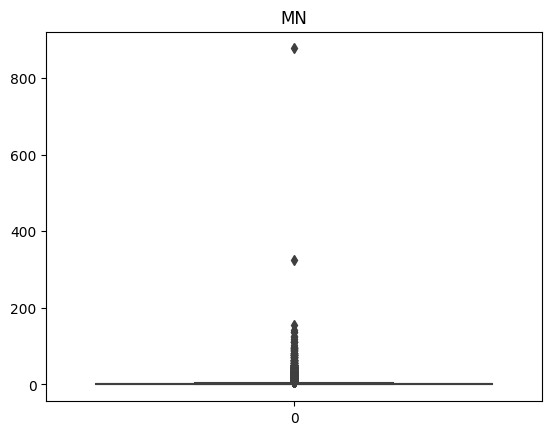

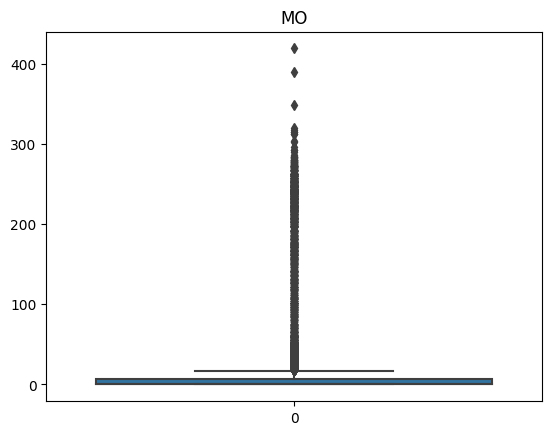

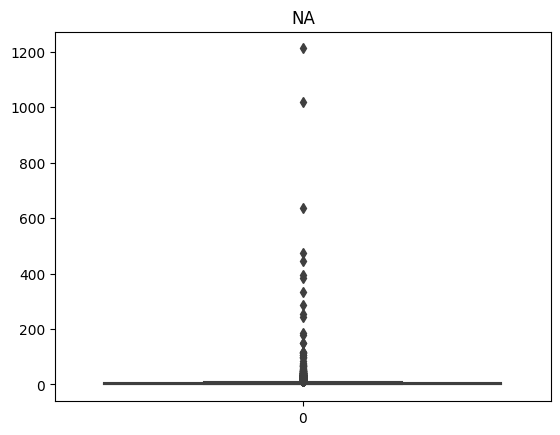

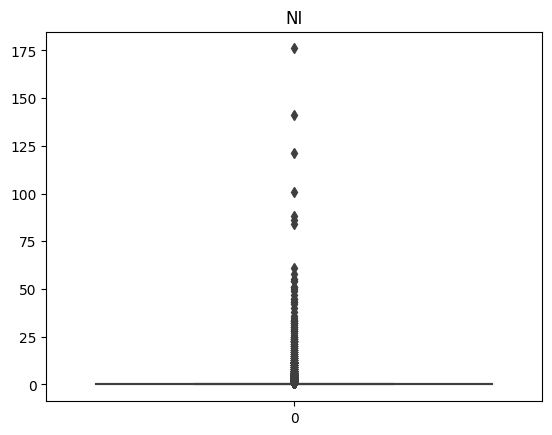

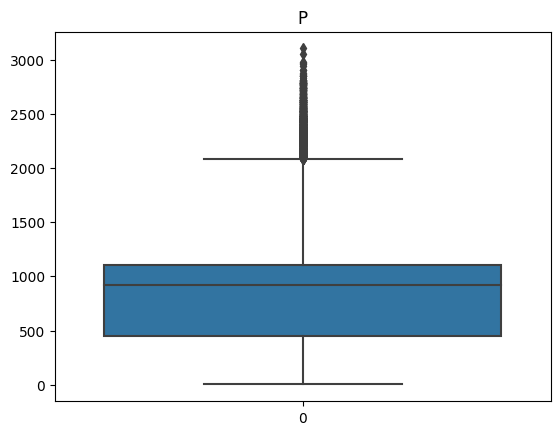

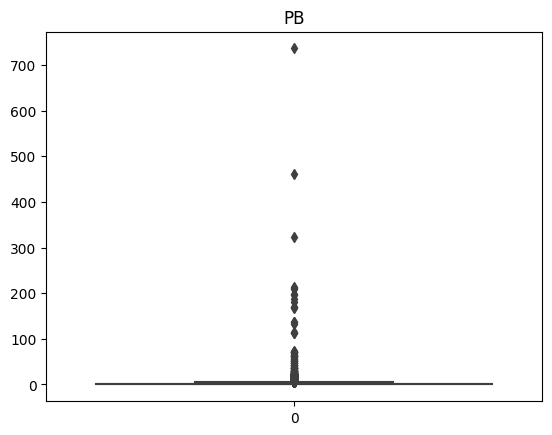

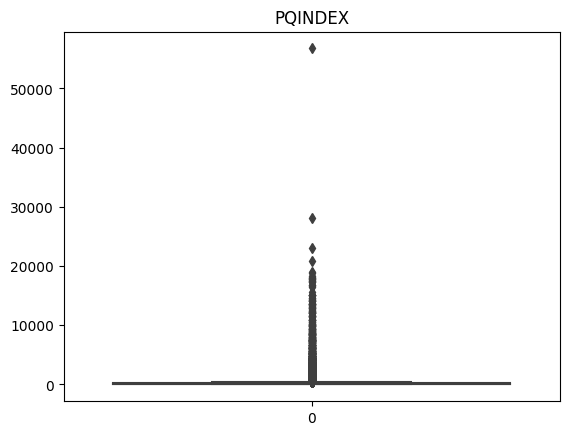

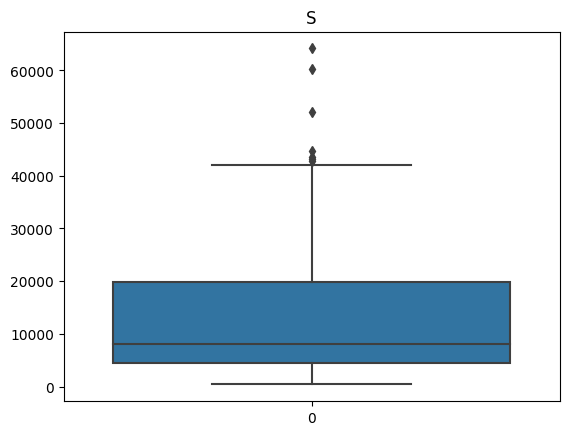

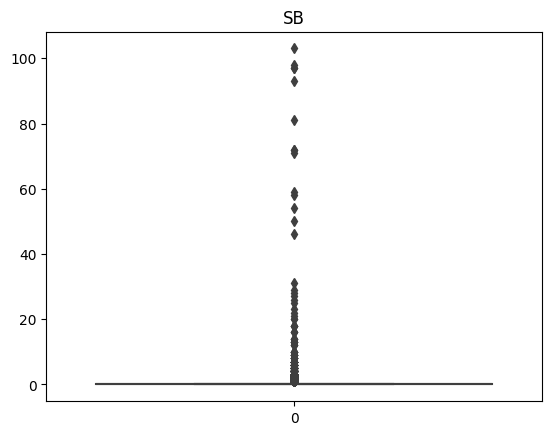

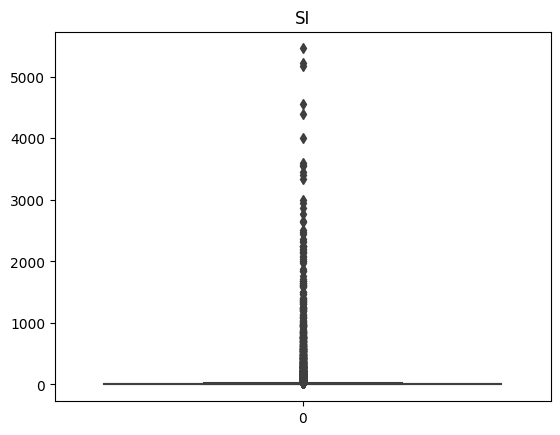

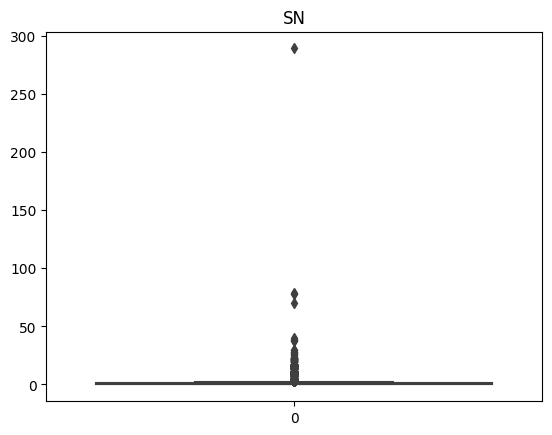

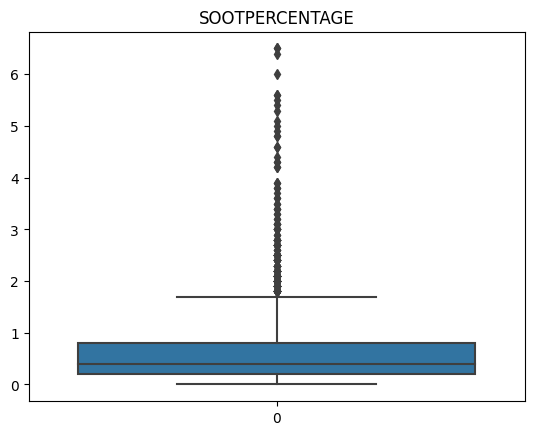

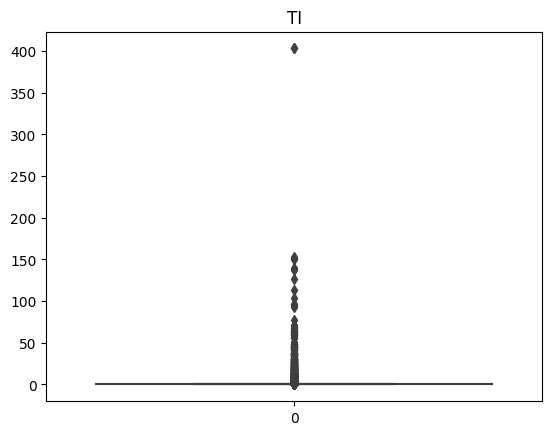

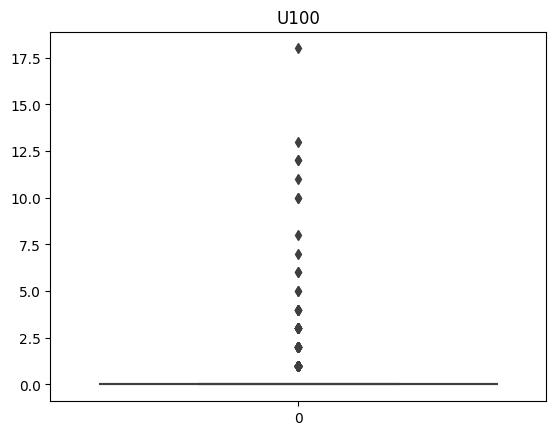

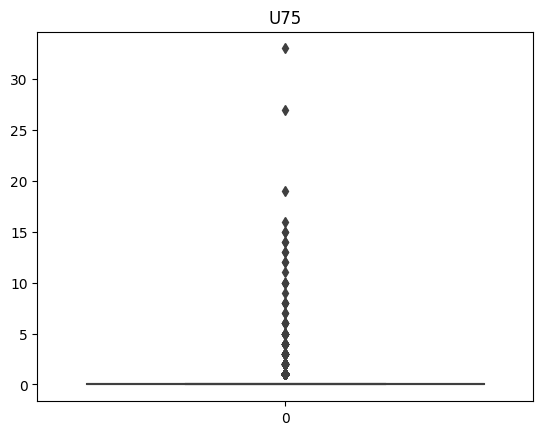

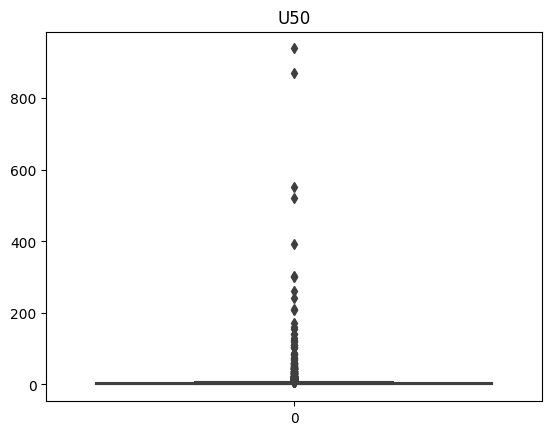

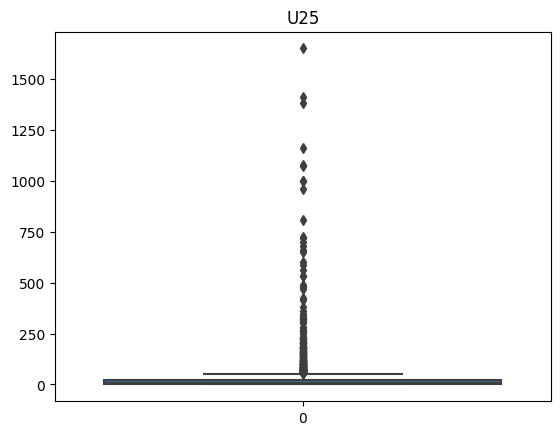

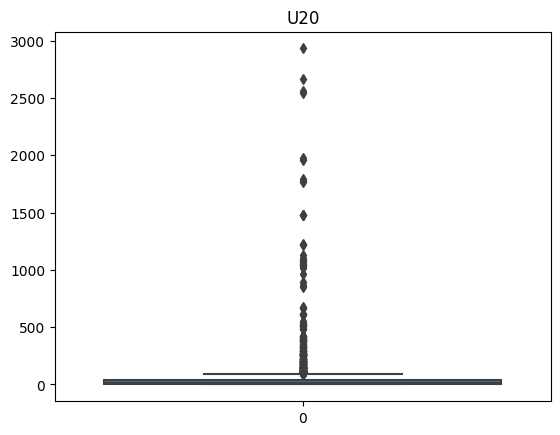

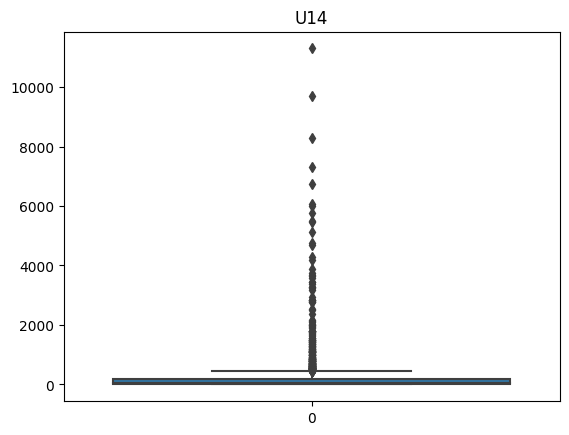

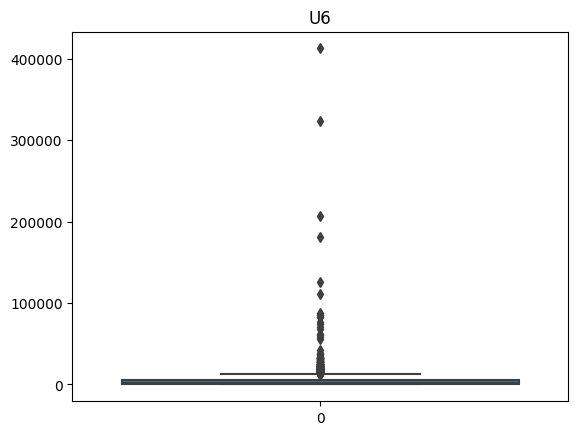

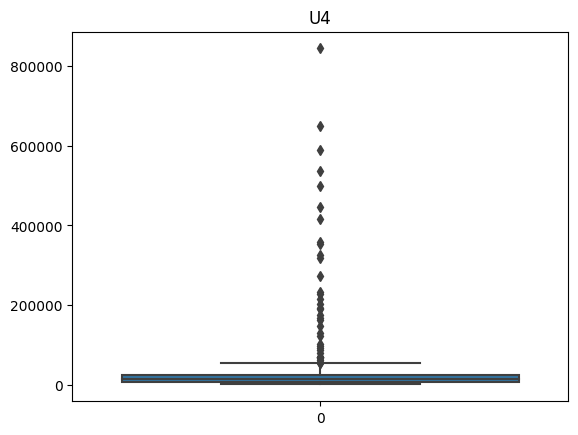

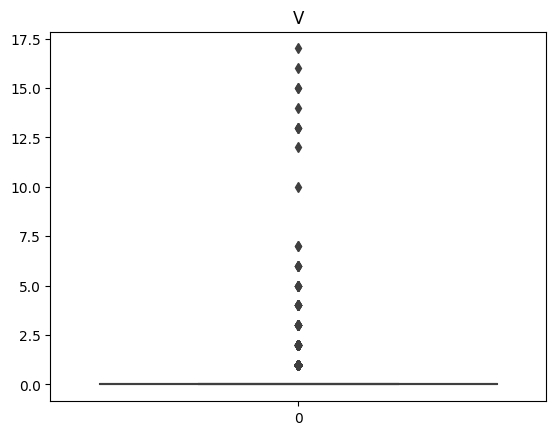

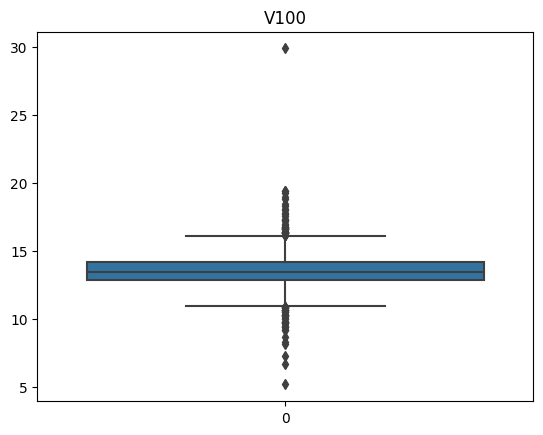

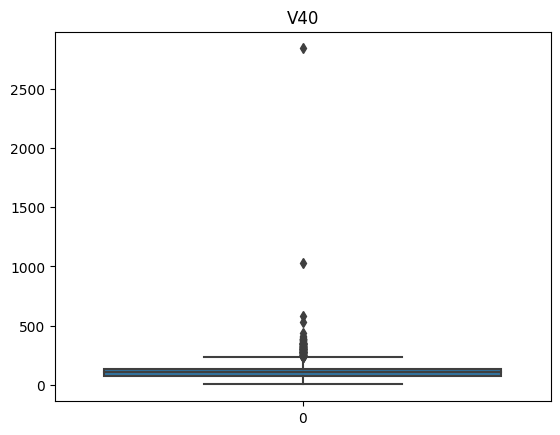

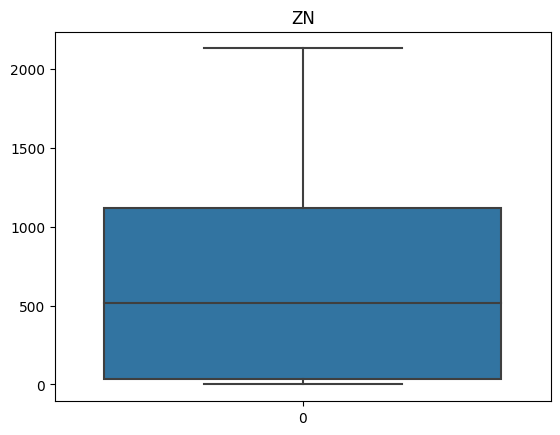

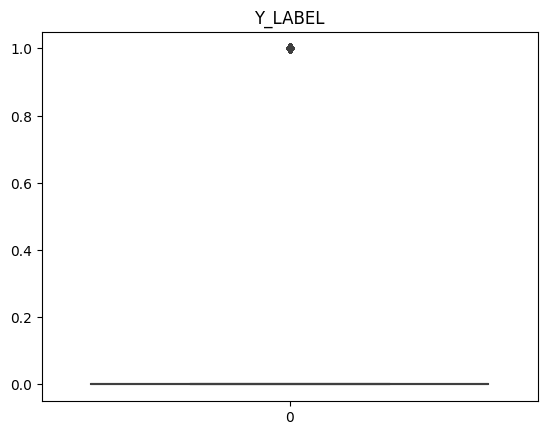

In [8]:
label_encoders = {}

for col in ['COMPONENT_ARBITRARY', 'YEAR']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])
    label_encoders[col] = le

# showing outliers with boxplot in the dataset
num_cols=[col for col in df.columns if df[col].dtypes!="O" and col not in ['COMPONENT_ARBITRARY', 'YEAR']]
for i in df[num_cols].columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()



### Feature Scailing

In [9]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df[features]
y = df['Y_LABEL']

X = sc.fit_transform(X)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (11276, 18)
X_test shape:  (2819, 18)
y_train shape:  (11276,)
y_test shape:  (2819,)


### MODELING AND EVALUATING

In [16]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [17]:
from catboost import Pool, CatBoostClassifier
# MODELING:

knn=KNeighborsClassifier()
svc=SVC(random_state=42)
nb=GaussianNB()
dtc=DecisionTreeClassifier(random_state=42)
rfc=RandomForestClassifier(random_state=42)
xgb=XGBClassifier(random_state=42)
gbc=GradientBoostingClassifier(random_state=42)
abc=AdaBoostClassifier(random_state=42)
lr=LogisticRegression(max_iter=309,random_state=42,solver="liblinear",C=0.1)
ct=CatBoostClassifier(verbose=1,random_state=42)

models = [knn, svc, nb, dtc, rfc, xgb,gbc, abc, lr,ct]
overral=pd.DataFrame(columns=["Model","Accuracy Score","R2 Score","F1 SCORE","AUC-ROC"])
for model in models:

    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)

    overral=overral._append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,"R2 Score":r2,"F1 SCORE":f1,"AUC-ROC":auc},ignore_index=True)

    print("Model: ",model.__class__.__name__)
    print("Classification Report: \n",classification_report(y_test,y_pred))
    fig=px.imshow(confusion_matrix(y_test,y_pred),color_continuous_scale='tropic',title="Confusion Matrix of "+model.__class__.__name__,
              labels=dict(x="Predicted",y="Actual",color="Counts"),color_continuous_midpoint=0.8,
              width=400,height=400,template="plotly_dark",text_auto=True)
    fig.show()
    print("----------------------------------------------------------")


overral=overral.sort_values(by="Accuracy Score",ascending=False)
overral=overral.style.background_gradient(cmap="Spectral")
overral

Model:  KNeighborsClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      2203
           1       0.74      0.46      0.57       616

    accuracy                           0.85      2819
   macro avg       0.80      0.71      0.74      2819
weighted avg       0.84      0.85      0.83      2819



----------------------------------------------------------
Model:  SVC
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      2203
           1       0.83      0.42      0.56       616

    accuracy                           0.85      2819
   macro avg       0.84      0.70      0.74      2819
weighted avg       0.85      0.85      0.84      2819



----------------------------------------------------------
Model:  GaussianNB
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      2203
           1       0.74      0.34      0.47       616

    accuracy                           0.83      2819
   macro avg       0.79      0.65      0.68      2819
weighted avg       0.82      0.83      0.80      2819



----------------------------------------------------------
Model:  DecisionTreeClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2203
           1       0.59      0.60      0.60       616

    accuracy                           0.82      2819
   macro avg       0.74      0.74      0.74      2819
weighted avg       0.82      0.82      0.82      2819



----------------------------------------------------------
Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      2203
           1       0.76      0.61      0.68       616

    accuracy                           0.87      2819
   macro avg       0.83      0.78      0.80      2819
weighted avg       0.87      0.87      0.87      2819



----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      2203
           1       0.76      0.62      0.68       616

    accuracy                           0.87      2819
   macro avg       0.83      0.78      0.80      2819
weighted avg       0.87      0.87      0.87      2819



----------------------------------------------------------
Model:  GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      2203
           1       0.77      0.57      0.65       616

    accuracy                           0.87      2819
   macro avg       0.83      0.76      0.79      2819
weighted avg       0.86      0.87      0.86      2819



----------------------------------------------------------
Model:  AdaBoostClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      2203
           1       0.79      0.50      0.61       616

    accuracy                           0.86      2819
   macro avg       0.83      0.73      0.76      2819
weighted avg       0.86      0.86      0.85      2819



----------------------------------------------------------
Model:  LogisticRegression
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2203
           1       0.83      0.36      0.51       616

    accuracy                           0.84      2819
   macro avg       0.84      0.67      0.71      2819
weighted avg       0.84      0.84      0.82      2819



----------------------------------------------------------
Learning rate set to 0.028987
0:	learn: 0.6702790	total: 57.5ms	remaining: 57.5s
1:	learn: 0.6496768	total: 73.9ms	remaining: 36.9s
2:	learn: 0.6306485	total: 106ms	remaining: 35.2s
3:	learn: 0.6134470	total: 135ms	remaining: 33.7s
4:	learn: 0.5986338	total: 145ms	remaining: 28.9s
5:	learn: 0.5844829	total: 161ms	remaining: 26.6s
6:	learn: 0.5707608	total: 173ms	remaining: 24.5s
7:	learn: 0.5554218	total: 186ms	remaining: 23s
8:	learn: 0.5421728	total: 203ms	remaining: 22.4s
9:	learn: 0.5307101	total: 215ms	remaining: 21.3s
10:	learn: 0.5194834	total: 229ms	remaining: 20.6s
11:	learn: 0.5084208	total: 244ms	remaining: 20.1s
12:	learn: 0.4988400	total: 259ms	remaining: 19.7s
13:	learn: 0.4900883	total: 274ms	remaining: 19.3s
14:	learn: 0.4811394	total: 290ms	remaining: 19s
15:	learn: 0.4719926	total: 306ms	remaining: 18.8s
16:	learn: 0.4632572	total: 320ms	remaining: 18.5s
17:	learn: 0.4554505	total: 334ms	remaining: 18.2s
18:	l

----------------------------------------------------------


,Model,Accuracy Score,R2 Score,F1 SCORE,AUC-ROC
9,CatBoostClassifier,0.877616,0.283330,0.692239,0.788380
4,RandomForestClassifier,0.873714,0.260480,0.679279,0.779452
5,XGBClassifier,0.873359,0.258403,0.679821,0.780394
6,GradientBoostingClassifier,0.868393,0.229321,0.652947,0.759675
7,AdaBoostClassifier,0.862008,0.191929,0.612164,0.731031
1,SVC,0.854204,0.146228,0.557589,0.697971
0,KNeighborsClassifier,0.847109,0.104682,0.570289,0.709220
8,LogisticRegression,0.844980,0.092219,0.506215,0.671605
2,GaussianNB,0.829727,0.002895,0.469027,0.654829
3,DecisionTreeClassifier,0.822632,-0.038652,0.597424,0.743261


In [38]:
ct= CatBoostClassifier(iterations=1050,
                          learning_rate=0.015,
                          eval_metric='AUC',
                          random_seed=24930541,
                          bagging_temperature=0.2,
                          od_type='Iter',
                          metric_period=50,
                          od_wait=100,
                          subsample=0.820,verbose=None)
ct.fit(X_train,y_train)

0:	total: 18.5ms	remaining: 19.4s
50:	total: 598ms	remaining: 11.7s
100:	total: 864ms	remaining: 8.12s
150:	total: 1.14s	remaining: 6.81s
200:	total: 1.42s	remaining: 5.99s
250:	total: 1.69s	remaining: 5.39s
300:	total: 1.96s	remaining: 4.88s
350:	total: 2.25s	remaining: 4.48s
400:	total: 2.52s	remaining: 4.08s
450:	total: 2.79s	remaining: 3.7s
500:	total: 3.07s	remaining: 3.36s
550:	total: 3.34s	remaining: 3.03s
600:	total: 3.62s	remaining: 2.7s
650:	total: 3.89s	remaining: 2.38s
700:	total: 4.17s	remaining: 2.08s
750:	total: 4.45s	remaining: 1.77s
800:	total: 4.71s	remaining: 1.47s
850:	total: 4.99s	remaining: 1.17s
900:	total: 5.29s	remaining: 875ms
950:	total: 5.57s	remaining: 579ms
1000:	total: 5.84s	remaining: 286ms
1049:	total: 6.11s	remaining: 0us


In [33]:
# inference
df_test = sc.fit_transform(df_test)

In [34]:
y_pred=ct.predict_proba(df_test)[:,1]
y_pred

array([0.16826583, 0.07122394, 0.15513677, ..., 0.04104612, 0.11249842,
       0.95644667])

### Submission

In [35]:
submit = []
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

### Submission

In [37]:
submit = pd.read_csv(path + '/sample_submission.csv')
submit['Y_LABEL'] = y_pred
submit.to_csv(path + '/submit_0908_3.csv', index=False)